In [1]:
# importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# reading the dataset onto the python environment

In [4]:
data=pd.read_csv(r"C:\Users\DERIC JOSE\Downloads\titanic_dataset (1).csv")

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# analysing the dataset

In [7]:
data.shape

(891, 12)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
# dropping cabin

In [11]:
data.drop('Cabin',axis=1,inplace=True)

In [12]:
# Checking for skewedness and filling the missing values

<AxesSubplot:>

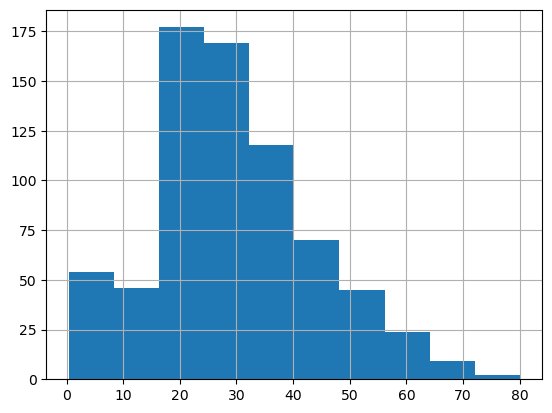

In [13]:
data["Age"].hist()

In [14]:
# right skewed data ,so we can fill with median

In [15]:
data['Age'] = data['Age'].fillna(data['Age'].median())

In [16]:
data['Age'].isna().sum()

0

In [17]:
# filling object datatype using mode (categorical data)

In [18]:
data['Embarked']= data["Embarked"].fillna(data['Embarked'].mode()[0])

In [19]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [20]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [21]:
# Dropping non-contributing features from the dataset

In [22]:
data.drop('PassengerId',axis=1,inplace=True)

In [23]:
data['Name'].nunique()

891

In [24]:
data.drop('Name',axis=1,inplace=True)

In [25]:
data['Ticket'].nunique()

681

In [26]:
data.drop('Ticket',axis=1,inplace=True)

In [27]:
data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [28]:
data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [29]:
#encoding the data

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
le = LabelEncoder()
data["Sex"]= le.fit_transform(data['Sex'])
data["Embarked"] = le.fit_transform(data['Embarked'])

In [32]:
data.dtypes

Survived      int64
Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int32
dtype: object

In [33]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [34]:
X = data.drop('Survived',axis=1) #feature set
y = data['Survived']     # Target set

In [35]:
# splitting into train and test data

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Using SVM

In [38]:
from sklearn.svm import SVC

In [39]:
svm_clf = SVC(kernel='linear')
svm_model = svm_clf.fit(X_train,y_train)
svm_pred = svm_model.predict(X_test)

In [40]:
score_svm = svm_model.score(X_test,y_test)
score_svm

0.7821229050279329

In [41]:
# K-Fold Cross Validation

In [42]:
from sklearn.model_selection import KFold

In [43]:
KFold_validator = KFold(10)

In [44]:
from sklearn.model_selection import cross_val_score

In [45]:
kfcv_result = cross_val_score(svm_model,X,y,cv=KFold_validator)

In [46]:
kfcv_result

array([0.81111111, 0.82022472, 0.75280899, 0.84269663, 0.76404494,
       0.79775281, 0.74157303, 0.73033708, 0.84269663, 0.76404494])

In [47]:
np.mean(kfcv_result)

0.786729088639201

In [48]:
## Stratified K-Fold cross validation

In [49]:
from sklearn.model_selection import StratifiedKFold

In [50]:
skfold_validator = StratifiedKFold(n_splits=10)

In [51]:
skcv_result = cross_val_score(svm_model,X,y,cv=skfold_validator)

In [52]:
skcv_result

array([0.81111111, 0.79775281, 0.76404494, 0.84269663, 0.79775281,
       0.7752809 , 0.76404494, 0.74157303, 0.80898876, 0.76404494])

In [53]:
np.mean(skcv_result)

0.786729088639201

# Using kNN Model

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
from sklearn.metrics import accuracy_score

In [56]:
metric_k = []
neighbors = range(3,18)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier = classifier.fit(X_train,y_train)
    y_pred_kNN = classifier.predict(X_test)
    acc = accuracy_score(y_test,y_pred_kNN)
    metric_k.append(acc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [57]:
metric_k

[0.7262569832402235,
 0.7206703910614525,
 0.7206703910614525,
 0.7318435754189944,
 0.7262569832402235,
 0.7150837988826816,
 0.7262569832402235,
 0.7150837988826816,
 0.7430167597765364,
 0.7150837988826816,
 0.7318435754189944,
 0.7318435754189944,
 0.7374301675977654,
 0.7486033519553073,
 0.7374301675977654]

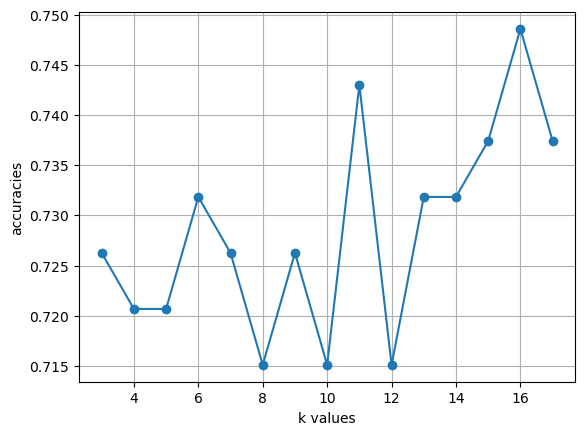

In [58]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k values')
plt.ylabel('accuracies')
plt.grid()

In [59]:
knn_model = KNeighborsClassifier(n_neighbors=16)
knn_model = knn_model.fit(X_train,y_train)
pred_kNN = knn_model.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [60]:
accuracy_score(y_test,pred_kNN)

0.7486033519553073

In [61]:
## K-Fold Cross Validation

In [62]:
cv_result1 = cross_val_score(knn_model,X,y,cv=KFold_validator)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [63]:
cv_result1

array([0.61111111, 0.69662921, 0.64044944, 0.74157303, 0.6741573 ,
       0.75280899, 0.68539326, 0.74157303, 0.80898876, 0.74157303])

In [64]:
np.mean(cv_result1)

0.7094257178526842

In [65]:
## Stratified K-Fold cross validation

In [66]:
skcv_result1 = cross_val_score(knn_model,X,y,cv=skfold_validator)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [67]:
skcv_result1

array([0.63333333, 0.65168539, 0.66292135, 0.78651685, 0.69662921,
       0.71910112, 0.73033708, 0.73033708, 0.7752809 , 0.71910112])

In [68]:
np.mean(skcv_result1)

0.7105243445692884